# Practical 8: Pandas to Machine learning

<div class="alert alert-block alert-success">
<b>Objectives:</b> In this practical we keep moving with applied demonstrations of modules you can use in Python. Today we continue to practice using Pandas, but also start applying some common machine learning techniques. Specifically, we will use Cluster Analysis [also known as unsupervised machine learning] to study distinct groupings. We will also use a method to predict a label based on a number of features, or variables [also known as supervised machine learning]
    
We will work with an existing dataset published as part of a bio-aerosol experiment described in the following paper:
    
*Intercomparison of Multiple UV-LIF [Ultraviolet - Light Induced Flourescence] Spectrometers Using the Aerosol Challenge Simulator, Atmosphere 2019, 10, 797; doi:10.3390/atmos10120797*
    
In this dataset, we have collected the instrument response of pollens, fungal spores and bacteria. Whilst we investigated the response of specific types of pollens and so on, we provide you with the data for these broad classifications. Thus, the data include the flourescence spectra, size and shape alongside one of three labels: pollen, spore or bacteria. In an ideal world, a clustering algorithm would be able to seperate each data point into a distinct grouping with no overlap between classes, but is this possible? Let us find out.

The notebook is split according to the following activities.
    
 - [1) Introduction to Machine Learning](#Part1)
 - - [1.1)The Evolution of AI and the Rise of Foundational Models](#Part1.1)
 - [2) Introduction to Unsupervised learning - Cluster Analysis](#Part2)
    * [Exercise 1: Produce a boxplot of flourescence spectra as a function of aerosol](#Exercise1)
    * [Exercise 2: Produce a boxplot of normalised flourescence spectra as a function of aerosol type](#Exercise2)
 - - [2.1) K-means cluster analysis](#Part2.1)
 - - [2.2) Scaling data prior to clustering - 'Standardising' ](#Part2.2)
 - - [2.3) Working with 'labelled' data](#Part2.3)
 - - [2.4) Dimension reduction](#Part2.4)
 - - [2.5) Evaluating the accuracy of a clustering algorithm with 'labelled' data](#Part2.5)
      * [Exercise 3: Apply K-means to the target label with no dimension reduction and only spectral characteristics.](#Exercise3)    
 - [3) Introduction to Supervised Machine Learning](#Part3)
 - - [3.1) Train, test and validate](#Part3.1)
 - - [3.2) Predicting Labels from Features using Random Forests in scikit-learn](#Part3.2)
      * [Exercise 4: Evaluate the accuracy of a Random Forest Classifier in predicting the target label using only size and shape](#Exercise4)
 
As with our other notebooks, we will provide you with a template for plotting the results. Also please note that you should not feel pressured to complete every exercise in class. These practicals are designed for you to take outside of class and continue working on them. Proposed solutions to all exercises can be found in the 'Solutions' folder.
</div>

<div class="alert alert-block alert-danger">
<b> Using Google Colabs </b> Please note that the first code block ensures that we can access our files IF we are running this example on Google Colab. Please run this code block and, if you are not on Google Colab, you will recieve a message that confirms this. 
</div>

In [ ]:
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    mount='/content/gdrive'
    print("Colab: mounting Google drive on ", mount)
    drive.mount(mount)
    drive_root = mount + "/My Drive/Colab Notebooks/DEES_first_year/DEES_programming_course"
    # Change to the directories to get data files
    print("\nColab: Changing directory to ", drive_root)
    %cd $drive_root
else:
    print('Not running on CoLab')

## 1) Introduction to Machine Learning <a name="Part1"></a>

Machine learning (ML) is a branch of artificial intelligence (AI) that enables computers to learn from data and make predictions or decisions without being explicitly programmed. There is an important nuance in this narrative; software engineers and scienctists are still required, but the ultimate aim is to enable automation. Unlike traditional programming, where a set of rules is hard-coded by humans, machine learning systems improve their performance by identifying patterns in data.  The best example from this course would be referring back to using Python to integrate differential equations. In that notebook you explicitly wrote down the equations to be solved.  What if we didnt know what the underlying theory was but we had data on the system we are interested in? This is one example where machine learning could be used and applied to the data to understand what underlying processes may be occuring. ML algorithms can broadly be categorized into supervised and unsupervised learning. In supervised learning, the algorithm learns from labeled data, meaning each input has a corresponding known output. This approach is commonly used for tasks such as image classification, spam detection, and predicting house prices. In contrast, unsupervised learning involves training algorithms on data without explicit labels. These algorithms identify hidden structures or patterns in the data, making it useful for tasks such as customer segmentation or anomaly detection. A [schematic](https://towardsdatascience.com/machine-learning-algorithms-in-laymans-terms-part-1-d0368d769a7b) on the different types of machine learning algorithms is provided in the figure below:

<div>
<img src="https://github.com/loftytopping/DEES_programming_course/blob/master/images/Practical_9_figure1.png?raw=true" width="600"/>
</div>

While all machine learning models aim to learn from data, they can be distinguished by the complexity of their architectures. Shallow learning models, such as linear regression, decision trees, and support vector machines, focus on relatively simple transformations of data and typically require more feature engineering from humans. On the other hand, deep learning refers to models that use neural networks with many layers to automatically learn hierarchical representations of data. These models are capable of handling vast amounts of unstructured data, such as images, audio, and text, and have driven breakthroughs in fields like computer vision, natural language processing, and robotics. There are a lot of approaches mentioned in the previous sentences. Do not worry about understanding what they mean since you are best placed to start learning about the wide range of approaches available according to your problem at hand. Indeed a course on manchine learning could fill a semester. For now, the key difference lies in the depth of the model and the level of abstraction it can achieve: shallow learning models are better suited for simpler tasks, while deep learning excels at capturing more complex patterns in large datasets. We will integrate a number of shallow models in this practical. The [figure](https://www.analyticsvidhya.com/blog/2022/12/machine-learning-with-limited-data/) below is a very nice visulisation of how choice of method, or algorithm, used depends on the amount of data you may have:

<div>
<img src="https://github.com/loftytopping/DEES_programming_course/blob/master/images/Practical_9_figure2.jpg?raw=true" width="600"/>
</div>


If you are interested in learning more about Deep Learning (DL), a number of references will be given during the course.

### 1.1) The Evolution of AI and the Rise of Foundational Models <a name="Part1.1"></a>
Artificial Intelligence (AI) has seen unprecedented advancements in recent years, largely driven by breakthroughs in machine learning techniques and the availability of vast amounts of data and computational power. Early AI systems were task-specific, relying on carefully designed rules to perform narrow functions such as playing chess or automating simple workflows. However, recent progress has led to the emergence of more generalized AI systems capable of performing a wide variety of tasks with minimal human intervention. A significant milestone in this evolution is the development of foundational models—large, versatile machine learning models that serve as a base for many AI applications across different domains.

Foundational models, such as large language models (e.g., GPT) and multimodal models (which process both text and images), are trained on massive datasets and can be fine-tuned for specific tasks with relatively small amounts of additional data. These models demonstrate an advanced capability to understand and generate human-like text, interpret images, and even engage in complex problem-solving. While they offer immense potential, foundational models also come with challenges, including the need for immense computational resources, concerns about bias, and ethical considerations. Their emergence marks a shift from traditional, task-specific AI systems toward more adaptable and scalable AI solutions that push the boundaries of what machine learning can achieve. Guess what, the Python ecosystem has adapted to this rapid pace such that we can even consider building our own foundational model if we had the right computer hardware. This is beyond the remit of this course, but we can still interact with any number of developments in this space, including LLMs, or Large Language Models, to which ChatGPT is the perfect example. 

First lets start with some common applications of machine learning.

## 2) Introduction to Unsupervised learning - Cluster Analysis <a name="Part1.2"></a>

Machine learning is all the rage these days. One branch of machine learning are a family of algorithms known as unsupervised methods. These attempt to extract patterns from a dataset according to a number of assumptions. Cluster Analysis is a subset of such methods, and used across the sciences. An excellent overview of some of the challenges is given in the documentation of a method known as [HDBSCAN](https://hdbscan.readthedocs.io/en/latest/comparing_clustering_algorithms.html)

>> There are a lot of clustering algorithms to choose from. The standard sklearn clustering suite has thirteen different clustering classes alone. So what clustering algorithms should you be using? As with every question in data science and machine learning it depends on your data. A number of those thirteen classes in sklearn are specialised for certain tasks (such as co-clustering and bi-clustering, or clustering features instead data points). Obviously an algorithm specializing in text clustering is going to be the right choice for clustering text data, and other algorithms specialize in other specific kinds of data. Thus, if you know enough about your data, you can narrow down on the clustering algorithm that best suits that kind of data, or the sorts of important properties your data has, or the sorts of clustering you need done. 

We are going to use the K-means method for our first example of clustering. K-means is perhaps one of the most simplest methods for clustering and, whilst fast, has limitations when dealing with complex datasets. Distance-based clustering is an unsupervised machine learning technique used to group similar data points into clusters based on their proximity in feature space. This is another way of defining similarity. Our brains start to learn similarity between objects from the day we are born. But what do we do with numbers? Basically we assume that numbers that are close together might belong to the same 'group'. These numbers can represent features; abstract ones or physical variables such as height, weight, poewr etc. The goal is to minimize the distance between points within the same cluster while maximizing the distance between points in different clusters. A common way to measure this distance is through metrics such as Euclidean distance. Distance-based clustering is useful for tasks like customer segmentation, image compression, and anomaly detection, where the structure or grouping in data isn’t immediately apparent.


If you are interested you can find some excellent tutorials and examples on the official [Scikit-learn webpage](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) 

<div>
<img src="https://github.com/loftytopping/DEES_programming_course/blob/master/images/sphx_glr_plot_kmeans_assumptions_001.png?raw=true" width="600"/>
</div>

Before we jump into using K-means, we need to try and understand our data. So, let us load our data and take a preview of our dataframe. 

In [1]:
import pandas as pd #Im using pd here as its easier to keep writing! You can use whatever you want, but it might help you to use 'pd' for now.
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import os
from os import path

path=os.getcwd()

data = pd.read_csv(path+"/data/MBS_data_final.csv") 
    
# How do we preview the data file.
# Preview the first 5 lines of the loaded data 
data.head()
#data.columns.values

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


,Unnamed: 0,Time(ms),XE1_all,XE2_all,XE3_all,XE4_all,XE5_all,XE6_all,XE7_all,XE8_all,Size,Shape,FT,label
0,38,122980,104,327,621,584,394,384,170,155,2.2410,10.28,0,bacteria
1,39,123027,86,184,363,322,224,147,98,127,1.3340,16.96,0,bacteria
2,40,123090,93,203,305,308,173,135,88,121,0.9175,11.16,0,bacteria
3,41,123131,108,212,476,336,193,168,117,125,1.4090,18.26,0,bacteria
4,42,123290,104,435,776,544,336,253,124,140,1.9880,18.30,0,bacteria


The columns labelled <code> Size </code> and <code> Shape </code> report the size, in microns, of each sampled particulate and the shape is a value that tells us how long or spherical our particle is. The Multiparameter Bioaerosol Spectrometer (MBS) is a development of the Wideband Integrated Bioaerosol Spectrometer (WIBS) technology developed by the University of Hertfordshire . Both instruments are designed to acquire data relating to the size, shape and intrinsic fluorescence of individual airborne particles and use these data to detect and potentially classify those particles that are of biological origin. The MBS
records the fluorescence over eight equal wavelength bands from approximately 310 to 640 nm. You see this recorded here through column names <code> XE1_all </code> to <code> XE8_all </code>. The MBS also uses an arrangement of two 512 pixel CMOS
detector arrays to record high-resolution details of the particle’s spatial light scattering pattern, allowing both the macroscopic shape of the particle and potentially particle surface characteristics to be determined. We can extract a list of unique entries from our label column and print to screen as follows:

In [2]:
data['label'].unique() 

array(['bacteria', 'fungal', 'pollen'], dtype=object)

Out of interest, we may wish to visualise the spread of values for both size and shape as a function of label. This is useful as we begin to try and understand how our data may lead to seperation between different particle types. In the following code we produce a collection of subplots by using conditional statements for size, shape and labels. Can you make sense of how we are selecting components of our dataframe for each plot using the unique label entries?

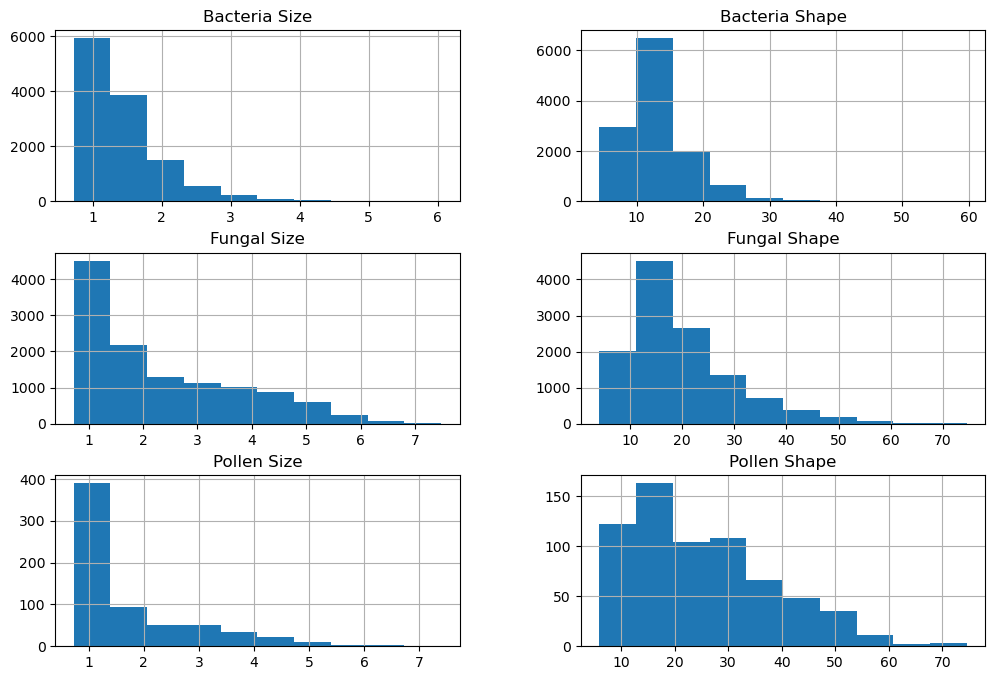

In [3]:
fig, axs = plt.subplots(3, 2, figsize=(12, 8), sharey=False)
# Bacteria
data[data['label'] == 'bacteria'].hist(column='Size',ax=axs[0,0])
data[data['label'] == 'bacteria'].hist(column='Shape',ax=axs[0,1])
# Fungal
data[data['label'] == 'fungal'].hist(column='Size',ax=axs[1,0])
data[data['label'] == 'fungal'].hist(column='Shape',ax=axs[1,1])
# Pollen
data[data['label'] == 'pollen'].hist(column='Size',ax=axs[2,0])
data[data['label'] == 'pollen'].hist(column='Shape',ax=axs[2,1])

axs[0,0].title.set_text('Bacteria Size')
axs[0,1].title.set_text('Bacteria Shape')

axs[1,0].title.set_text('Fungal Size')
axs[1,1].title.set_text('Fungal Shape')

axs[2,0].title.set_text('Pollen Size')
axs[2,1].title.set_text('Pollen Shape')

We see that data from each particle type have qualitatively quite similar profiles. How might we visualise the flourescence spectra? I suggest we produce a boxplot of data from each channel as a function of label in the first exercise below.

<div class="alert alert-block alert-success">
<b> Exercise 1: Produce a boxplot of flourescence spectra as a function of aerosol type <a name="Exercise1"></a>  </b> 

In the code box below, we have provided you with a template for again producing figures on three rows, corresponding to the three distinct labels. The code is incomplete. We need to produce a boxplot of data from the following columns:
    
    XE1_all, XE2_all, XE3_all, XE4_all, XE5_all, XE6_all, XE7_all, XE8_all
    
When complete, your plot should resemble the following figure:
    
![](images/cluster1.png) 

<div class="alert alert-block alert-warning">
<b>Please note:</b> For each boxplot you will need to change the values within the command:

```python
ax=axs[0]
```
where the value in the square brackets indicates the subplot number.

</div>

</div>


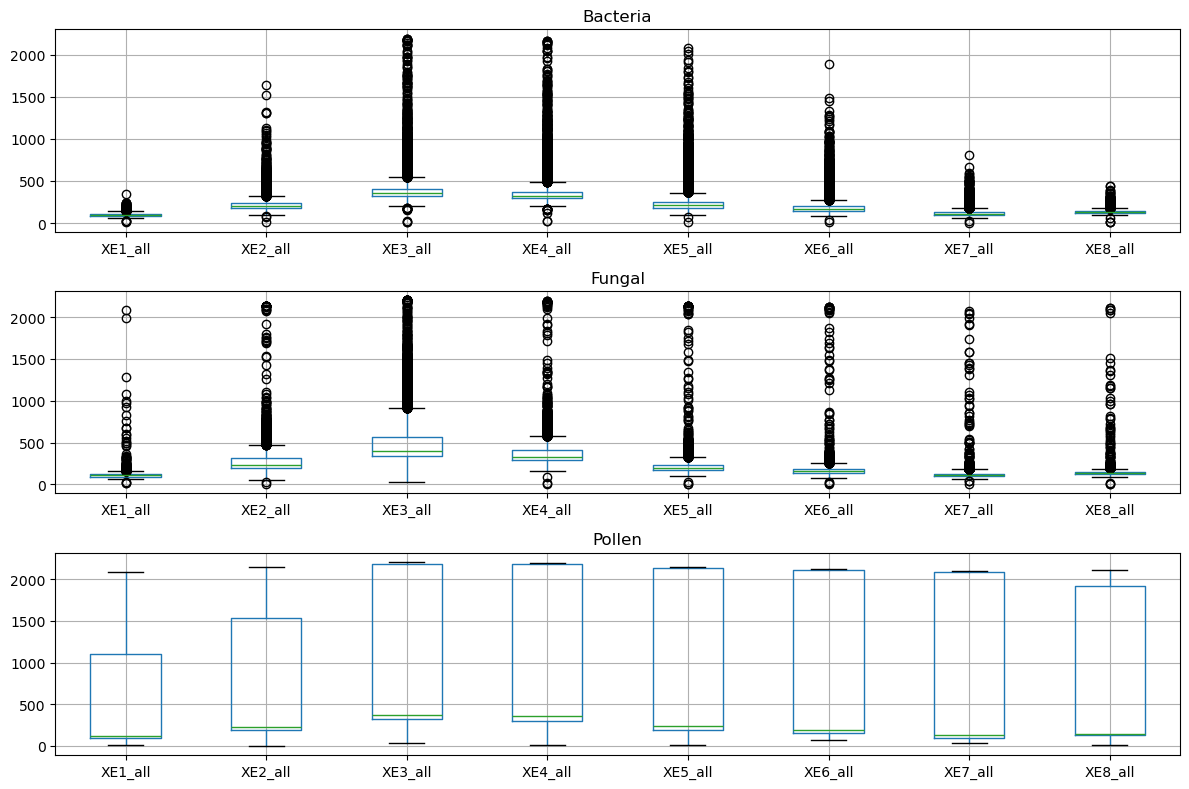

In [4]:
fig, axs = plt.subplots(3, 1, figsize=(12, 8), sharey=False)

#------'INSERT CODE HERE'------
# Bacteria
data[data['label'] == 'bacteria'].boxplot(column=['XE1_all','XE2_all','XE3_all','XE4_all','XE5_all','XE6_all','XE7_all','XE8_all'], ax=axs[0])
# Fungal
data[data['label'] == 'fungal'].boxplot(column=['XE1_all','XE2_all','XE3_all','XE4_all','XE5_all','XE6_all','XE7_all','XE8_all'], ax=axs[1])
# Pollen
data[data['label'] == 'pollen'].boxplot(column=['XE1_all','XE2_all','XE3_all','XE4_all','XE5_all','XE6_all','XE7_all','XE8_all'], ax=axs[2])
#------------------------------

axs[0].title.set_text('Bacteria')
axs[1].title.set_text('Fungal')
axs[2].title.set_text('Pollen')
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

<div class="alert alert-block alert-success">
<b> Exercise 2: Produce a boxplot of normalised flourescence spectra as a function of aerosol type <a name="Exercise2"></a>  </b> 

In the following code I have decided its likely easier to visualise the flourescence data normalise to each particle. In other words, let us visualise the variation in flourescence intensity where each channel, thus <code> XE1 </code> etc, for each particle has been normalised to the total intensity for that particle. I import two additional modules to help us with this task: Numpy and Scikit-learn.  If you recall from the previous notebook, we can add additional columns into our dataframe quite easily. In this instance I extract existing flourescence intensity values from our dataframe and then apply a simple normalisation to this 2D array of values. I then enter each column of this new 2D array into new columns in our dataframe. If this part of the code does not make sense, do ask. Once you have completed the task above, repeat this here but display the data from our normalised dataset. Once complete, your figure should look like the following:

![](images/cluster2.png) 

<div class="alert alert-block alert-warning">
<b>Please note:</b> For each boxplot you will need to change the values within the command:

```python
ax=axs[0]
```
where the value in the square brackets indicates the subplot number.

</div>

</div>



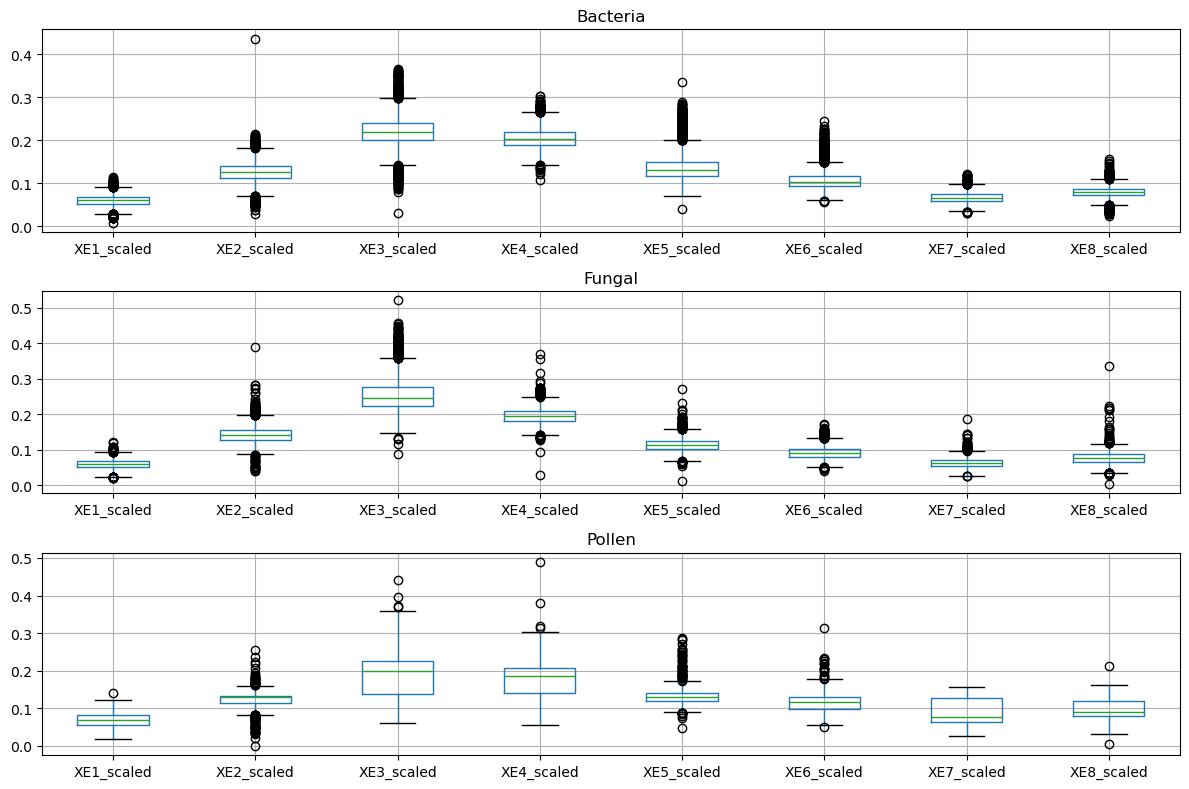

In [5]:
from sklearn.preprocessing import Normalizer
import numpy as np

# Extract the Flourescence data from our dataframe
array = data[['XE1_all','XE2_all','XE3_all','XE4_all','XE5_all','XE6_all','XE7_all','XE8_all']].values
# Sum each row
row_sums = array.sum(axis=1)
# Divide the current 2D array with the total from each row.
# The np.newaxis command simply changes the dimensions of row_sums from (24815) to (24815,1) so we can do the one line division operation
scaled = array / row_sums[:, np.newaxis]
# enter the new data as new columns into the dataframe
data['XE1_scaled'] = scaled[:,0]
data['XE2_scaled'] = scaled[:,1] 
data['XE3_scaled'] = scaled[:,2] 
data['XE4_scaled'] = scaled[:,3] 
data['XE5_scaled'] = scaled[:,4] 
data['XE6_scaled'] = scaled[:,5] 
data['XE7_scaled'] = scaled[:,6] 
data['XE8_scaled'] = scaled[:,7] 

# Now produce boxplots of data for each particle label
fig, axs = plt.subplots(3, 1, figsize=(12, 8), sharey=False)
#------'INSERT CODE HERE'------
# Bacteria
data[data['label'] == 'bacteria'].boxplot(column=['XE1_scaled','XE2_scaled','XE3_scaled','XE4_scaled','XE5_scaled','XE6_scaled','XE7_scaled','XE8_scaled'], ax=axs[0])
# Fungal
data[data['label'] == 'fungal'].boxplot(column=['XE1_scaled','XE2_scaled','XE3_scaled','XE4_scaled','XE5_scaled','XE6_scaled','XE7_scaled','XE8_scaled'], ax=axs[1])
# Pollen
data[data['label'] == 'pollen'].boxplot(column=['XE1_scaled','XE2_scaled','XE3_scaled','XE4_scaled','XE5_scaled','XE6_scaled','XE7_scaled','XE8_scaled'], ax=axs[2])
#------------------------------
axs[0].title.set_text('Bacteria')
axs[1].title.set_text('Fungal')
axs[2].title.set_text('Pollen')
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"


### 2.1) K-means cluster analysis <a name="Part2.1"></a>

K-means cluster analysis is perhaps the simplest method of all, but allows us to practice turning a dataset into one that contains a different number of clusters, members of which should have 'similar' properties. How we define the similarity between members can vary widely. Take the following [figure](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html):

![](https://github.com/loftytopping/DEES_programming_course/blob/master/images/Practical_8_blue_kmeans.png?raw=true) 


For this hypothetical 2D dataset, we can perhaps confidently calculate the correct number of clusters as 4. But, what if we simply dont know how many clusters we need or can't easily visualise all of the dimensions in our dataset? For our dataset, we can at least specify a number of clusrers and then visualise the properties of said clusters.  

In the following code snippet we perform a number of steps to label each observation [row in our dataset] as belonging to a particular cluster. The label is an integer value, and the distinction between clusters will be performed on the values of temperature, humidity and fire area:

<div class="alert alert-block alert-info">
    
 - 1) Extract our variables of interest from the dataframe into a new Numpy matrix
    
 - 2) Specify how many clusters we want the Kmeans algorithm to find: You would be right in assuming that an algorithm might give us the number of clusters by default. Some do, but for now we have to specific this. 
 
 - 3) Fit the clustering algorithm to our Numpy matrix: When we say we "fit" the Means algorithm (such as K-Means) to our data, we refer to the process of finding patterns or underlying structure by assigning data points to clusters based on their similarities. "Fitting" in this context means adjusting the model parameters — specifically, the positions of the cluster centroids — to best represent the natural groupings within the data. The algorithm iteratively optimizes these centroids by minimizing the distance between each data point and its assigned cluster center. The goal is to find a solution that "fits" the data by reducing the within-cluster variance, thereby creating well-defined clusters that capture meaningful patterns in the dataset.
 
 - 4) Extract the labels to which each row in our matrix has been assigned.
</div>





In [6]:
from sklearn.cluster import KMeans
# Extract our variables of interest from the dataframe into a new Numpy matrix
numpy_matrix = data[['XE1_scaled','XE2_scaled','XE3_scaled','XE4_scaled','XE5_scaled','XE6_scaled','XE7_scaled','XE8_scaled']].values
# Specify how many clusters we want the Kmeans algorithm to find
clusterer=KMeans(n_clusters=3)
# Fit the clustering algorithm to our Numpy matrix
clusterer.fit(numpy_matrix)
# Extract the labels to which each row in our matrix has been assigned.
labels = clusterer.labels_

# In the dataframe 'data' we can store the labels from using K-means:
data['K-means label'] = labels
# For example the following simply prints the new dataframe column to the screen
data['K-means label']

0        2
1        1
2        1
3        1
4        0
        ..
24810    1
24811    1
24812    1
24813    1
24814    2
Name: K-means label, Length: 24815, dtype: int32

Now let us look at the properties of these clusters by generating box-plots of values from our dataframe. We have already met multiple functions that can be applied to our dataframe. In Practical 7 we briefly produced box-plots of our dataframe using the:

```python
<<name of dataframe>>.boxplot(column=[<<names of columns>>])
```

command. We can also select a subset of values in the columns by asking the <code> boxplot </code> function to distinguish by a value found in a specific column. In the example below we expand the boxplot function to select values by K-means label through, for example:

```python
data.boxplot(column=['XE1_scaled'], by=['K-means label'], ax=ax[0])
```
In this case we are asking Python to produce a boxplot of values in the column <code> XE1_scaled </code> but also produce a number of seperate boxplots according the number of unique values given by the column <code> K-means label </code>.

Please check the following code snippet and then the box-plots. Do the collected properties of the different clusters allow you to distinguish between them? Do they 'look' different?

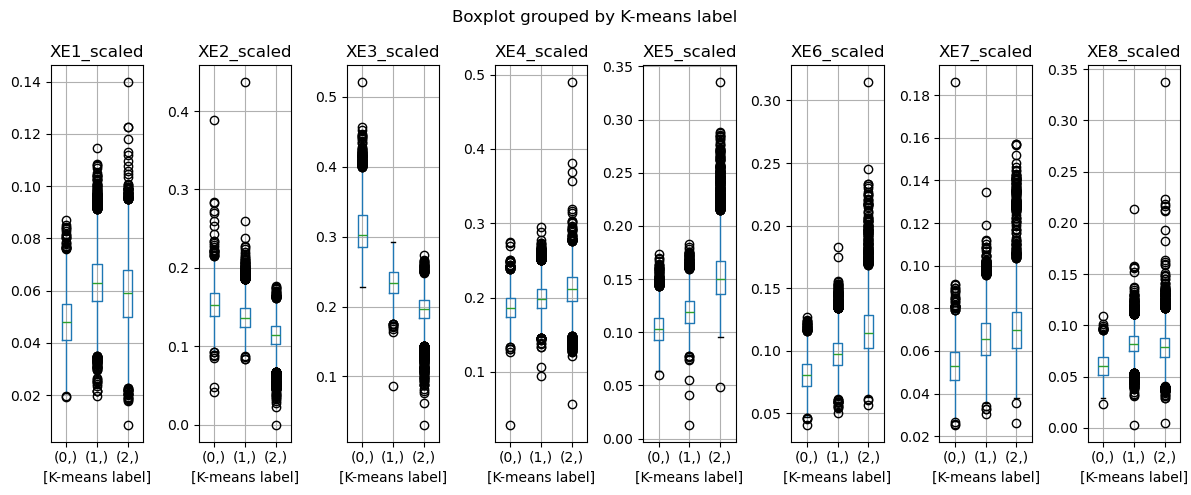

In [8]:
fig, ax = plt.subplots(1, 8, figsize=(12, 5))
data.boxplot(column=['XE1_scaled'], by=['K-means label'], ax=ax[0])
data.boxplot(column=['XE2_scaled'], by=['K-means label'], ax=ax[1])
data.boxplot(column=['XE3_scaled'], by=['K-means label'], ax=ax[2])
data.boxplot(column=['XE4_scaled'], by=['K-means label'], ax=ax[3])
data.boxplot(column=['XE5_scaled'], by=['K-means label'], ax=ax[4])
data.boxplot(column=['XE6_scaled'], by=['K-means label'], ax=ax[5])
data.boxplot(column=['XE7_scaled'], by=['K-means label'], ax=ax[6])
data.boxplot(column=['XE8_scaled'], by=['K-means label'], ax=ax[7])

plt.tight_layout()
plt.show()

### 2.2) Scaling data prior to clustering - 'Standardising'  <a name="Part2.2"></a>

We have mentioned 'distance' a few times with regards to clustering. In calculating a distance between points, we need to be mindful of the scale of each feature, or variable we are interested in. Taking the current dataset as an example, you can see that variable 'area' varies from less than 10 to 1000. On the other hand, variable 'temp' and 'RH' vary from 5 to 30 and 20 to 100 respectively. How do we know if 'area' is dominating the distance and thus clustering calculation? This is where scaling our data is important for distance-based clustering methods, such as **K-Means**, because these algorithms rely on calculating distances between data points to form clusters. If features in the dataset have different ranges or units (e.g., height in centimeters and weight in kilograms), features with larger ranges will dominate the distance calculations, causing biased clustering results. Scaling ensures that each feature contributes equally to the clustering process by standardizing them to comparable ranges, thus improving the algorithm's performance and ensuring fair treatment of all features.

---

Below are some common scaling techniques:

1. **Min-Max Scaling**: Rescales features to a fixed range, typically [0, 1].
2. **Standardization (Z-Score Scaling)**: Centers features to have a mean of 0 and a standard deviation of 1.
3. **Robust Scaling**: Uses the median and interquartile range, making it less sensitive to outliers.
4. **Max Abs Scaling**: Scales data to the range [-1, 1] based on the maximum absolute value of each feature.
5. **Log Scaling**: Applies a logarithmic transformation to reduce skewness in data with large ranges.

---

When reading literature and other examples in this space, you will find this is referred to as feature **stamdardisation** so it is worthwhile recognising interchangeable terms. 
Below are some Python examples of applying different scaling (standardisation) techniques using the `sklearn` library.

```python
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler

# Sample Data
data = pd.DataFrame({
    'Height (cm)': [150, 160, 170, 180, 190],
    'Weight (kg)': [50, 65, 70, 80, 90]
})

# 1. Min-Max Scaling
min_max_scaler = MinMaxScaler()
data_min_max_scaled = min_max_scaler.fit_transform(data)
print("Min-Max Scaled Data:")
print(data_min_max_scaled)

# 2. Standardization (Z-Score Scaling)
standard_scaler = StandardScaler()
data_standard_scaled = standard_scaler.fit_transform(data)
print("\nStandardized Data:")
print(data_standard_scaled)

# 3. Robust Scaling
robust_scaler = RobustScaler()
data_robust_scaled = robust_scaler.fit_transform(data)
print("\nRobust Scaled Data:")
print(data_robust_scaled)

# 4. Max Abs Scaling
max_abs_scaler = MaxAbsScaler()
data_max_abs_scaled = max_abs_scaler.fit_transform(data)
print("\nMax Abs Scaled Data:")
print(data_max_abs_scaled)
```

In the following code block we modify our previous example to use scaled data in the K-means algorithm. Run this and take a few minutes to visually check for any difference.

0        1
1        1
2        1
3        1
4        2
        ..
24810    1
24811    1
24812    1
24813    1
24814    1
Name: K-means label (scaled), Length: 24815, dtype: int32


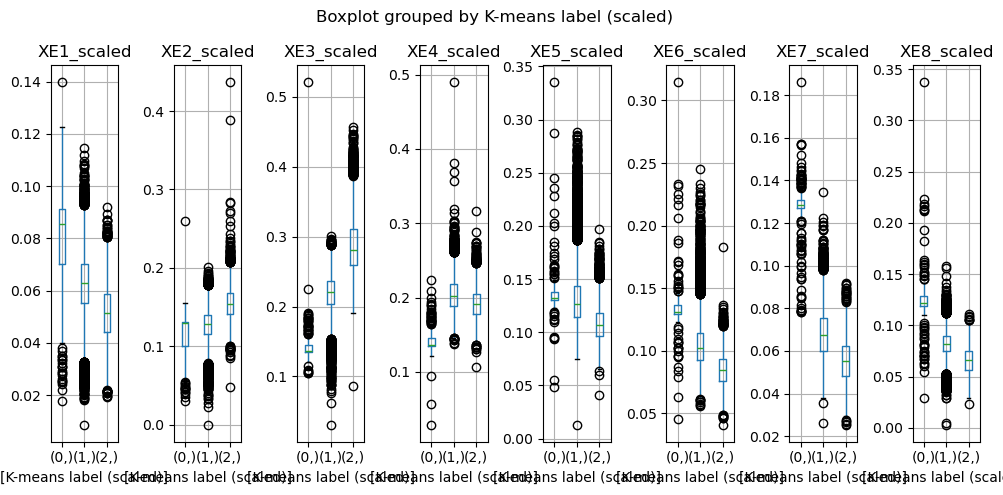

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Extract our variables of interest from the dataframe into a new Numpy matrix
numpy_matrix = data[['XE1_scaled','XE2_scaled','XE3_scaled','XE4_scaled','XE5_scaled','XE6_scaled','XE7_scaled','XE8_scaled']].values

# Apply Standard Scaling to ensure all features contribute equally to the clustering
scaler = StandardScaler()
scaled_matrix = scaler.fit_transform(numpy_matrix)

# Specify how many clusters we want the KMeans algorithm to find
clusterer = KMeans(n_clusters=3)

# Fit the clustering algorithm to the scaled matrix
clusterer.fit(scaled_matrix)

# Extract the labels to which each row in our matrix has been assigned
labels = clusterer.labels_

# Store the KMeans labels back into the dataframe
data['K-means label (scaled)'] = labels

# Print the new dataframe column to the screen
print(data['K-means label (scaled)'])

#Create a new plot
fig, ax = plt.subplots(1, 8, figsize=(10, 5))
data.boxplot(column=['XE1_scaled'], by=['K-means label (scaled)'], ax=ax[0])
data.boxplot(column=['XE2_scaled'], by=['K-means label (scaled)'], ax=ax[1])
data.boxplot(column=['XE3_scaled'], by=['K-means label (scaled)'], ax=ax[2])
data.boxplot(column=['XE4_scaled'], by=['K-means label (scaled)'], ax=ax[3])
data.boxplot(column=['XE5_scaled'], by=['K-means label (scaled)'], ax=ax[4])
data.boxplot(column=['XE6_scaled'], by=['K-means label (scaled)'], ax=ax[5])
data.boxplot(column=['XE7_scaled'], by=['K-means label (scaled)'], ax=ax[6])
data.boxplot(column=['XE8_scaled'], by=['K-means label (scaled)'], ax=ax[7])
plt.tight_layout()
plt.show()

Can you detect much of a difference in the outputs? It is difficult to assign any difference in a qualitative way. However we now have a slightly modified workflow as follows:

<div class="alert alert-block alert-info">
    
 - 1) Extract our variables of interest from the dataframe into a new Numpy matrix
    
 - 2) Scale the features (variables) prior to clustering: scaling our data is important for distance-based clustering methods, such as K-Means, because these algorithms rely on calculating distances between data points to form clusters. If features in the dataset have different ranges or units (e.g., height in centimeters and weight in kilograms), features with larger ranges will dominate the distance calculations, causing biased clustering results.
    
 - 3) Specify how many clusters we want the Kmeans algorithm to find: You would be right in assuming that an algorithm might give us the number of clusters by default. Some do, but for now we have to specific this. 
 
 - 4) Fit the clustering algorithm to our Numpy matrix: When we say we "fit" the Means algorithm (such as K-Means) to our data, we refer to the process of finding patterns or underlying structure by assigning data points to clusters based on their similarities. "Fitting" in this context means adjusting the model parameters — specifically, the positions of the cluster centroids — to best represent the natural groupings within the data. The algorithm iteratively optimizes these centroids by minimizing the distance between each data point and its assigned cluster center. The goal is to find a solution that "fits" the data by reducing the within-cluster variance, thereby creating well-defined clusters that capture meaningful patterns in the dataset.
 
 - 5) Extract the labels to which each row in our matrix has been assigned.
</div>




In the following section we work with data for which we know what the answers are. Before that, why not try to modify the example above and use a different scaler function.

### 2.3) Working with 'labelled' data <a name="Part2.3"></a>

Before applying clustering algorithms, a significant amount of time is typically spent exploring and understanding the data. This process, which we refer to as exploratory data analysis, or EDA, is crucial because clustering algorithms are highly sensitive to the scale, distribution, and structure of the data. Tasks such as handling missing values, removing outliers, normalizing features, and selecting relevant variables can greatly influence the quality of the clusters formed. Additionally, visualizing the data through plots and dimensionality reduction techniques can help uncover patterns and inform the choice of clustering parameters, like the number of clusters. In many cases, the success of a clustering task depends less on the algorithm itself and more on how well we prepare and understand the data beforehand.

In the next example we are going to use the fact that the bio-aerosol label is already known. You may well ask, well, if the cluster label is already known then why do we need to use cluster analysis? These labelled datasets are crucial to understand the accuracy of different clustering approaches. Moreover, if you had a small amount of data from controlled experiments you could test the accuracy of clustering approaches before applying this to lots of data for which you dont have the answer.


In the code block below we again produce plots that help us visualise the distribution of features for each bio-aerosol type but are perhaps more visually appealing

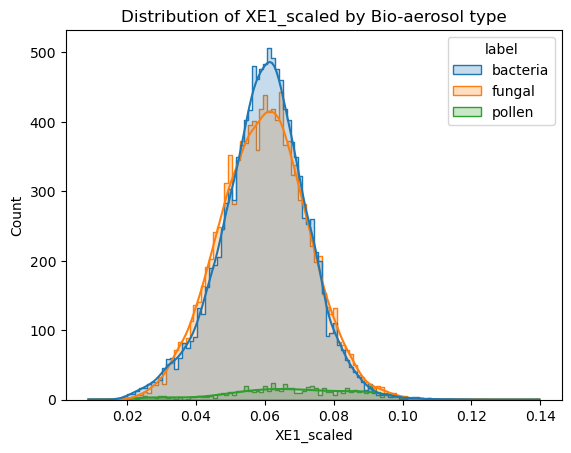

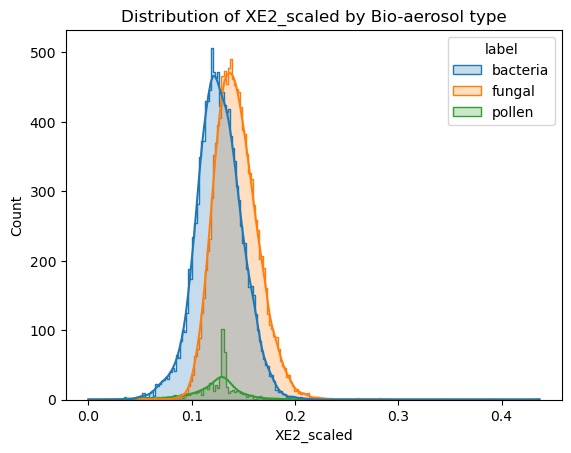

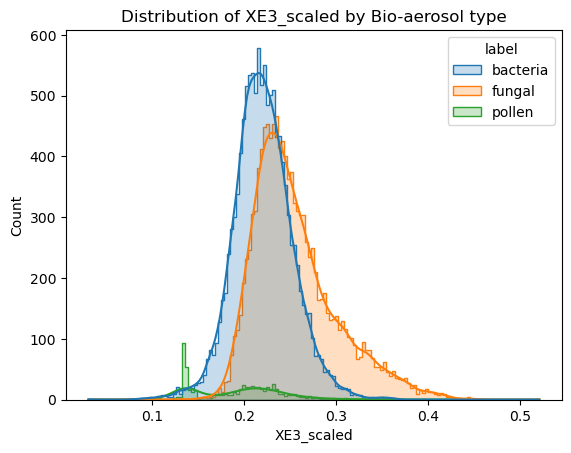

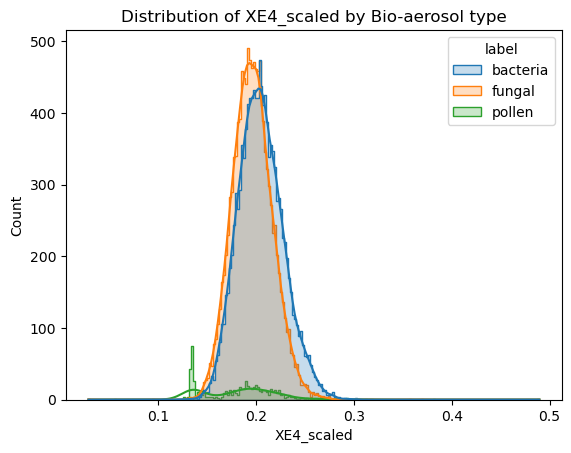

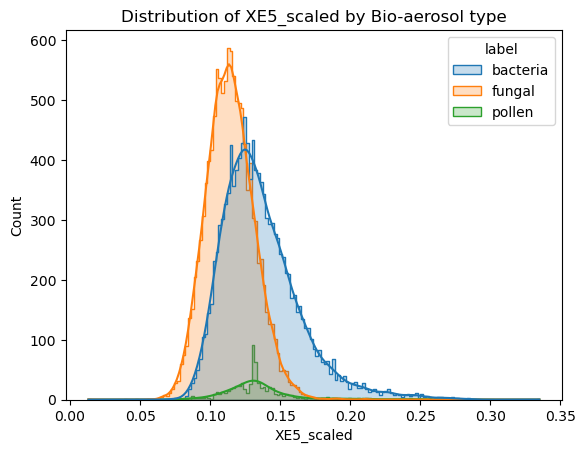

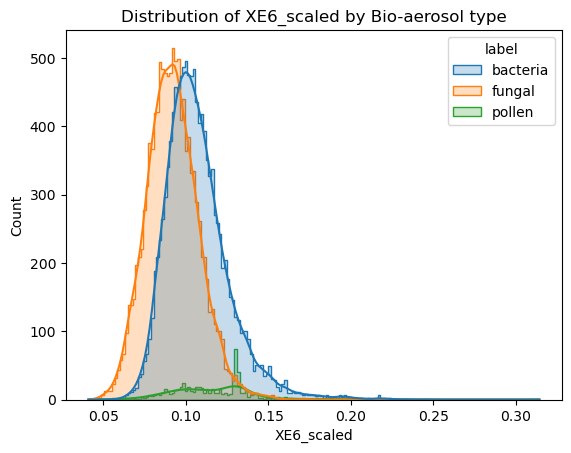

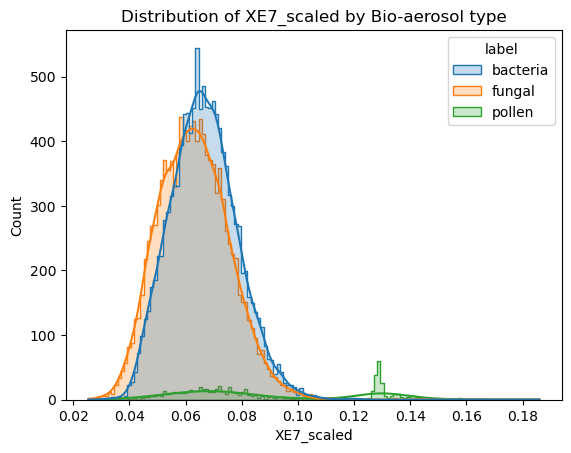

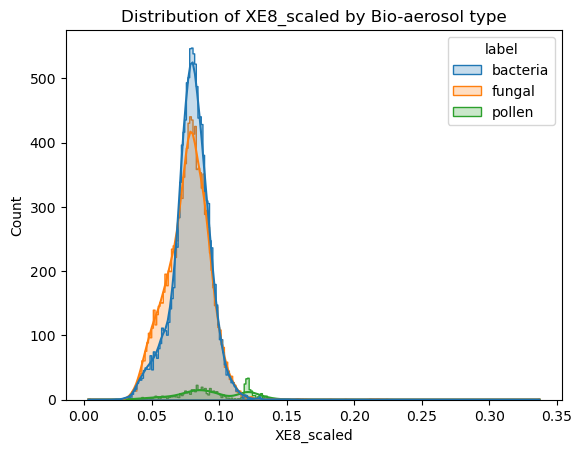

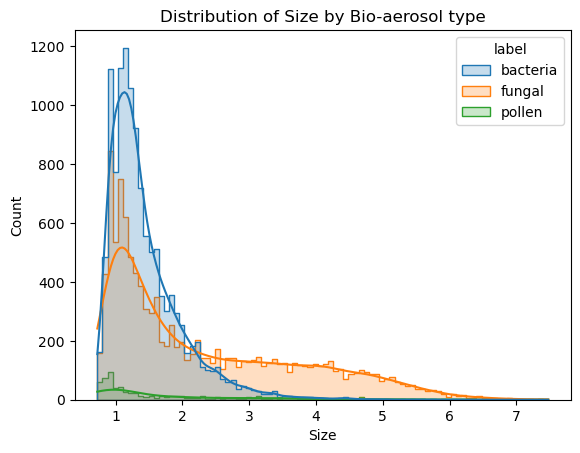

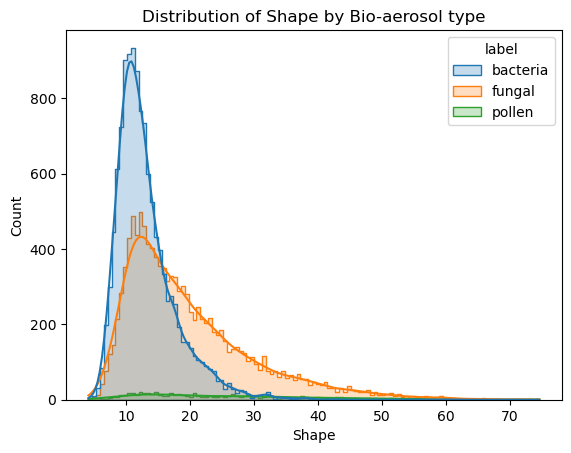

In [12]:
# Create a list of all column names to iterate through - make sure these are the same as entered in the dataframe
column_list=['XE1_scaled','XE2_scaled','XE3_scaled','XE4_scaled','XE5_scaled','XE6_scaled','XE7_scaled','XE8_scaled','Size','Shape']

for feature in column_list:
    # Create a histogram with hue controlled by the Family label
    sns.histplot(data=data, x=feature, hue='label', kde=True, element="step")
    plt.title(f'Distribution of {feature} by Bio-aerosol type')
    plt.show()


#### 2.4) Dimension reduction <a name="Part2.4"></a>

The above figures provide some interesting and useful insights in to our data. We can see that some features are clearly different for a given family label. This means these features are going to be useful in applying cluster analysis. However visualising multiple features can be tricky. We can use an approach called **Dimensionality Reduction** to try and visualise our entire collection of features in a new space.

Briefly, dimensionality reduction is a process used in machine learning to simplify high-dimensional datasets by transforming them into a lower-dimensional space while retaining as much of the original data's meaningful information as possible. High-dimensional data can be difficult to interpret, prone to overfitting, and computationally expensive to process. By reducing the number of features (or dimensions), we aim to improve model performance, reduce noise, and make the data easier to visualize and understand.

##### Why Are the New Features Considered 'Latent'?

The new features generated during dimensionality reduction are often referred to as latent features because they are not directly observed in the original dataset. Instead, they are abstract, derived representations that capture the underlying structure or patterns in the data. For example, in techniques like Principal Component Analysis (PCA), the new features (principal components) are linear combinations of the original features. These latent features are not tied to any specific real-world measurement but are mathematical constructs that explain the variance in the data. This makes them valuable for uncovering hidden relationships, but it also means they may be harder to interpret compared to the original features.

Lets apply PCA to our current dataset and show how to visualise the data in a new way:

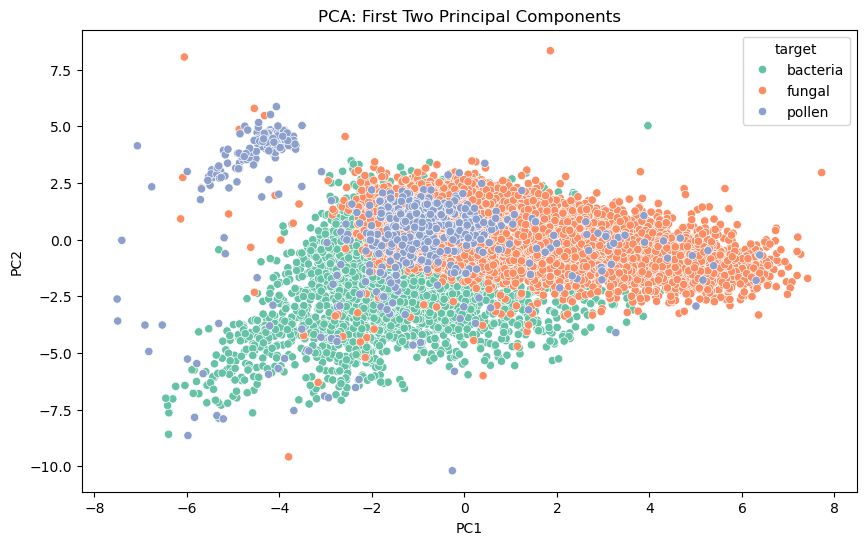

In [14]:
#Import the relevant libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Extract the features and target 'Family'
features = data[['XE1_scaled','XE2_scaled','XE3_scaled','XE4_scaled','XE5_scaled','XE6_scaled','XE7_scaled','XE8_scaled','Size','Shape']]
target = data['label']

# Step 1: Standardize the features - this is a process of ensuring our data is normalised
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 2: Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
pca_components = pca.fit_transform(features_scaled)

# Step 3: Create a new dataframe with the PCA components and target label
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['target'] = target

# Step 4: Plot the PCA results using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='target', palette='Set2')
plt.title('PCA: First Two Principal Components')
plt.show()


We can see some level of seperation between different targets, but still some overlap. 

### 2.5) Evaluating the accuracy of a clustering algorithm with 'labelled' data <a name="Part2.5"></a>

In this section we consolidate most of the above and determine how accurate K-means is in identifying distinct groups. The entire code to do this is provided shortly but please first read through the worklow before running it. The key steps are as follows:

1. Prepare the features and target variables
2. Standardise the dataset
3. Apply dimension reduction
4. Apply K-means clustering
5. Map clusters to true labels
6. Evaluate accuracy

---

#### Step 1: Prepare the features and target variables**
We first separate the features (22 columns) from the target label in the same way we did above.
```python
# Separate features and target
features = data[['XE1_scaled','XE2_scaled','XE3_scaled','XE4_scaled','XE5_scaled','XE6_scaled','XE7_scaled','XE8_scaled','Size','Shape']]
target = data['Family']
```

---

#### Step 2: Standardize the Features**

Since K-means is distance-based, we must standardize the features to ensure all variables contribute equally to the clustering.
```python
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
```

---

#### Step 3: Apply dimension reduction**

Since K-means is distance-based, we must standardize the features to ensure all variables contribute equally to the clustering.
```python
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(features_scaled)

# Create a new dataframe with the PCA components and target label
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['Genus'] = target

```

---

#### Step 4: Apply K-means Clustering**
We apply K-means clustering, specifying the number of clusters to match the number of unique values in the target. In this case, we know there are 4 unique entries for 'Family'
```python
from sklearn.cluster import KMeans

# Apply K-means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_components)
```

---

#### Step 5: Map Clusters to True Labels**
K-means assigns arbitrary cluster IDs, so we map the clusters to the most common true labels using the mode.
```python
def map_clusters_to_labels(predicted, true):
    labels = np.zeros_like(predicted)
    for i in np.unique(predicted):
        mask = predicted == i
        labels[mask] = np.bincount(true[mask]).argmax()
    return labels

# Map clusters to true labels
predicted_labels = map_clusters_to_labels(clusters, true_labels_encoded)

# Convert mapped numeric labels back to original string labels
predicted_labels = le.inverse_transform(predicted_labels)
```

---

#### Step 6: Evaluate Accuracy**
We calculate the accuracy by comparing the predicted labels with the true labels. The accuracy_score() function compares the true labels with the mapped predicted labels. Note that clustering labels retrieved from K-means are arbitrary, so mapping the predicted labels to the closest matching true labels is necessary for accuracy measurement. The confusion_matrix() function shows how well the clusters match the true classes. A confusion matrix is a table that summarizes the performance of a classification model by comparing its predicted labels with the actual labels. Each row represents the instances of an actual class, while each column represents the instances of a predicted class. This is best understood by running through the code example given below and then the follow-up exercise.

```python
from sklearn.metrics import accuracy_score, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(target, predicted_labels)
print(f'K-means Accuracy: {accuracy:.2f}')

# Print confusion matrix
conf_matrix = confusion_matrix(target, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=set(target), yticklabels=set(target))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
```
```

---

K-means Accuracy: 0.63
Confusion Matrix:
[[11736   492     0]
 [ 8042  3883     0]
 [  623    39     0]]


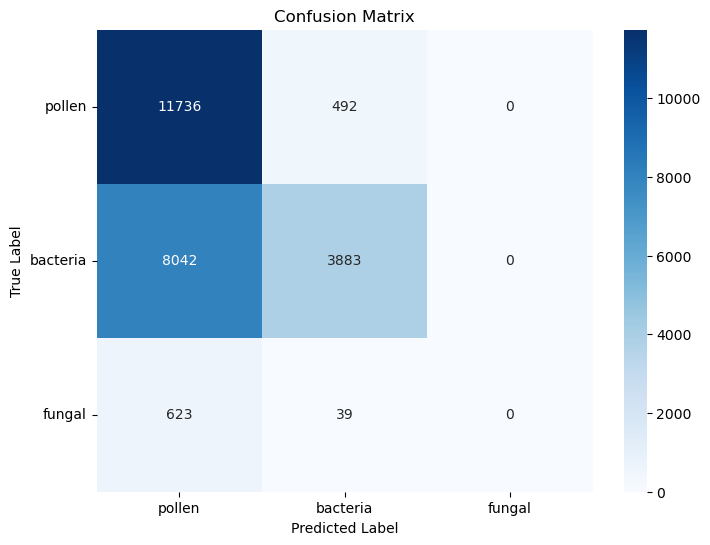

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.stats import mode
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 1) Separate features and target
features = data[['XE1_scaled','XE2_scaled','XE3_scaled','XE4_scaled','XE5_scaled','XE6_scaled','XE7_scaled','XE8_scaled','Size','Shape']]
target = data['label']

# Convert string labels to numeric labels
le = LabelEncoder()
true_labels_encoded = le.fit_transform(target)

# Step 2: Standardize the Features
# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 3: Apply dimension reduction
pca = PCA(n_components=2)
pca_components = pca.fit_transform(features_scaled)

# Create a new dataframe with the PCA components and target label
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['Family'] = target

# Step 4: Apply K-means Clustering**
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_components)

# Step 5: Map Clusters to True Labels**
def map_clusters_to_labels(predicted, true):
    labels = np.zeros_like(predicted)
    for i in np.unique(predicted):
        mask = predicted == i
        labels[mask] = np.bincount(true[mask]).argmax()
    return labels

# Map clusters to true labels
predicted_labels = map_clusters_to_labels(clusters, true_labels_encoded)

# Convert mapped numeric labels back to original string labels
predicted_labels = le.inverse_transform(predicted_labels)

# Step 6: Evaluate Accuracy
# Calculate accuracy
accuracy = accuracy_score(target, predicted_labels)
print(f'K-means Accuracy: {accuracy:.2f}')

# Print confusion matrix
conf_matrix = confusion_matrix(target, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=set(target), yticklabels=set(target))
# Rotate the y-axis labels to horizontal
plt.yticks(rotation=0)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

A confusion matrix is a table that allows us to visualize the performance of a classification algorithm. Each row represents the instances of the actual class, while each column represents the instances of the predicted class.

**Components of the Confusion Matrix:**

- **True Positives (TP):** Correctly predicted positive cases.
- **True Negatives (TN):** Correctly predicted negative cases.
- **False Positives (FP):** Incorrectly predicted positive cases (Type I error).
- **False Negatives (FN):** Incorrectly predicted negative cases (Type II error).

**Metrics Derived from the Confusion Matrix:**

- **Accuracy:** The proportion of correct predictions out of all predictions.
  
$$ \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} $$

In our example we can see that K-means clustering is only 63% accurate; much of this dominated by the imbalanced pollen class. 


<div class="alert alert-block alert-success">
<b> Exercise 3: Apply K-means to the target label with no dimension reduction and only spectral characteristics. <a name="Exercise3"></a>  </b> 

Repeat the K-means clustering workflow on our labelled data with two distinct changes:

     - Do not apply PCA for dimension reduction
     - Do not include the Shape and Size features
    
Do you obtain an accuray of x%?
    
</div>

K-means Accuracy: 0.63
Confusion Matrix:
[[11736   492     0]
 [ 8042  3883     0]
 [  623    39     0]]


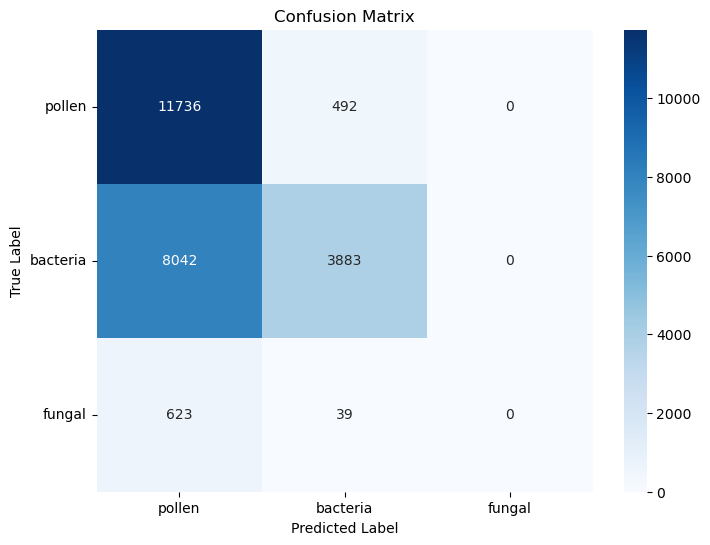

In [19]:
#-------'INSERT CODE HERE'-------

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.stats import mode
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 1) Separate features and target
features = data[['XE2_scaled','XE3_scaled','XE4_scaled']]
target = data['label']

# Convert string labels to numeric labels
le = LabelEncoder()
true_labels_encoded = le.fit_transform(target)

# Step 2: Standardize the Features
# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 3: Apply dimension reduction
# pca = PCA(n_components=2)
# pca_components = pca.fit_transform(features_scaled)

# Create a new dataframe with the PCA components and target label
# pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
# pca_df['Genus'] = target

# Step 4: Apply K-means Clustering**
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_components)

# Step 5: Map Clusters to True Labels**
def map_clusters_to_labels(predicted, true):
    labels = np.zeros_like(predicted)
    for i in np.unique(predicted):
        mask = predicted == i
        labels[mask] = np.bincount(true[mask]).argmax()
    return labels

# Map clusters to true labels
predicted_labels = map_clusters_to_labels(clusters, true_labels_encoded)

# Convert mapped numeric labels back to original string labels
predicted_labels = le.inverse_transform(predicted_labels)

# Step 6: Evaluate Accuracy
# Calculate accuracy
accuracy = accuracy_score(target, predicted_labels)
print(f'K-means Accuracy: {accuracy:.2f}')

# Print confusion matrix
conf_matrix = confusion_matrix(target, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=set(target), yticklabels=set(target))
# Rotate the y-axis labels to horizontal
plt.yticks(rotation=0)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



#------------------------------

## 2) Introduction to Supervised Machine Learning <a name="Part2"></a>

Before we finish, it is worthwhile taking a look at how to apply supervised machine learning algorithms. Supervised learning is a fundamental branch of machine learning where models are trained on labeled datasets, meaning each input is paired with a known output. This approach enables the model to learn the relationship between inputs and outputs, facilitating accurate predictions on new, unseen data. Common applications include classification tasks, such as email spam detection, and regression tasks, like forecasting sales figures. In our eaxmple, we could develop a workflow to predict the bio-aerosol class as a function of measured features. In this case, it might be useful to train a method on the data we already have...and then apply it to new data obtained from complex ambient experiments. 

Supervised learning involves training models on labeled datasets, where each training example is paired with an output label. The goal is to learn a mapping from inputs to outputs that can be used to predict the labels of new, unseen data. Supervised learning algorithms are broadly categorized into:

- **Classification Algorithms:** Used when the output variable is a category, such as 'spam' or 'not spam'.
- **Regression Algorithms:** Used when the output variable is a continuous value, such as predicting house prices.

There are a number of methods available for each task:

Classification Algorithms:
 - Decision Trees: Models that split data into branches to make decisions based on feature values.
 - Support Vector Machines (SVM): Algorithms that identify the optimal boundary separating different classes.
 - k-Nearest Neighbors (k-NN): Methods that classify data points based on the majority class among their nearest neighbors.
 - Naive Bayes: Probabilistic classifiers based on Bayes' theorem, assuming feature independence.
 - **Neural Networks: Computational models inspired by the human brain, capable of capturing complex patterns in data.**

Regression Algorithms:
 - Linear Regression: Models that establish a linear relationship between input features and the target variable.
 - Ridge and Lasso Regression: Variants of linear regression that incorporate regularization to prevent overfitting.
 - Polynomial Regression: Models that capture non-linear relationships by incorporating polynomial terms of the input features.
 - Support Vector Regression (SVR): An extension of SVM for predicting continuous outcomes.
 - Decision Tree Regression: Models that predict continuous values by learning decision rules from the features.


### 2.1) Train, test and validate <a name="Part2.1"></a>

There is an important step we will now introduce in our approach to fitting machine learning models. Datasets are typically divided into three subsets: training, validation, and test sets. 
 - The training set is used to fit the model's parameters, enabling it to learn patterns within the data. 
 - The validation set assists in tuning hyperparameters and provides an unbiased evaluation during model development, helping to prevent overfitting. 
 - Finally, the test set offers an independent assessment of the model's performance, ensuring it generalizes well to new, unseen data. 
 
This is perhaps best visualised in the following [schematic](https://medium.com/@rahulchavan4894/understanding-train-test-and-validation-dataset-split-in-simple-quick-terms-5a8630fe58c8):

<div>
<img src="https://github.com/loftytopping/DEES_programming_course/blob/master/images/Practical_9_figure3.png?raw=true" width="600"/>
</div>

 
This structured division is crucial for developing robust and reliable machine learning models. There are a number of new terms here which you may have not come across before. For example, **Hyperparameters** are the configurable parameters set before the training process of a machine learning (ML) model. They control the behaviour of the training algorithm and impact on the model’s performance. Unlike regular parameters, which are learned by the model during training (e.g., weights in a neural network), hyperparameters must be defined before training starts.

In simple terms:

 - Parameters are learned from the data.
 - Hyperparameters are set by you before training. For example, the number of layers in a neural network. 


Do not worry, this section is to act as an introductory demonstration to applying supervised methods. Machine learning, and subsets of the field, require modules and programmes by themselves. However by building your, poentially, first supervised method you could dive much deeper into this expanding area of research. In the following code block we train and validate a common supervised learning algorithm known as random forests.

### 2.2) Predicting Labels from Features using Random Forests in scikit-learn <a name="Part2.2"></a>

In the following example, we will use the existing Frog dataset to demonstrate how to build on our existing examples and:

1. Split the data into training and testing sets.
2. Train a Random Forest classification model.
3. Predict labels for new data points.
4. Evaluate the model using accuracy and a confusion matrix.

The goal is to classify each sample into one of labels held within the required label:


Training samples: 19852
Testing samples: 4963
Random Forest model trained successfully!
Predicted labels: ['bacteria' 'pollen' 'bacteria' 'bacteria' 'bacteria']
True labels: 2497     bacteria
24444      pollen
1087     bacteria
20226      fungal
12528      fungal
Name: label, dtype: object
Accuracy: 0.76
Confusion Matrix:
[[1958  514    0]
 [ 560 1780    2]
 [  43   52   54]]


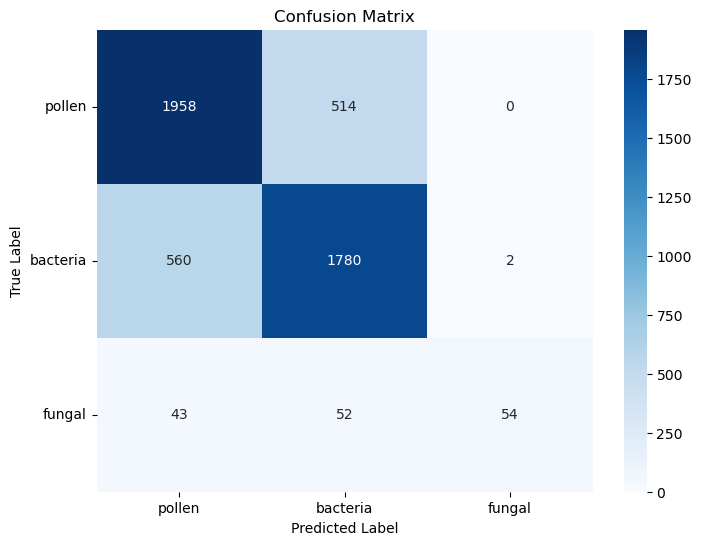

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

features = data[['XE1_scaled','XE2_scaled','XE3_scaled','XE4_scaled','XE5_scaled','XE6_scaled','XE7_scaled','XE8_scaled','Size','Shape']]
target = data['label']

# 1) Split the data into training and testing sets.
X = features
y = target
# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

# Step 2: Train a Random Forest classification model.
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the model
rf_model.fit(X_train, y_train)
print("Random Forest model trained successfully!")

# Step 3: Predict labels for new data points.
# Predict the species for the test set
predictions = rf_model.predict(X_test)

# Print the first few predictions
print("Predicted labels:", predictions[:5])
print("True labels:", y_test[:5])

# Step 4: Apply K-means Clustering**
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)


# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=set(target), yticklabels=set(target))
# Rotate the y-axis labels to horizontal
plt.yticks(rotation=0)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

What does this visulisation tell us? We are able to reach an accuracy of 76% which sounds better. As noted previously, from this point on there is much more to learn about machine learning. You may be wondering what the variable n_estimators refers to in the line:

```python
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
```

This is one the hyperparameters we mentioned earlier. In this case, the number of estimators refers to the number of individual trees in the forest :). The [illustration](https://medium.com/@roiyeho/random-forests-98892261dc49) below tries to explain this:

<div>
<img src="https://github.com/loftytopping/DEES_programming_course/blob/master/images/Practical_9_figure3.png?raw=true" width="600"/>
</div>

Briefly, in a **Random Forest**, the number of estimators refers to the number of **decision trees** that the algorithm builds before making predictions. It is controlled by the parameter `n_estimators` in `RandomForestClassifier`. Each tree is trained on a random subset of the data and features, and the final prediction is made by **aggregating the outputs of all the trees** (via majority voting for classification or averaging for regression).


#### Why the Number of Estimators Matters
- **More trees** generally improve the model’s accuracy because the forest becomes more robust and less prone to overfitting individual samples.
- **Too few trees** can result in an underfit model, missing important patterns in the data.
- **Too many trees** increase computational cost and training time without significant performance gains after a certain point.

#### How It Works in Practice
1. **During Training**: Each tree in the forest is trained on a different random subset of the data (bagging).
2. **During Prediction**: For classification, each tree votes on the predicted class. The class with the most votes is the final prediction.


#### Key Trade-off
- **Higher `n_estimators` improves performance but increases computation time**.
- In practice, values between **100 and 500 trees** are typically sufficient for most problems.

#### Example: Understanding the Impact of `n_estimators`
The effect of `n_estimators` on accuracy can be explored by training Random Forest models with different numbers of trees and comparing their performance. 


A number of resources are provided at the bottom of this notebook should you be interested. This includes learning how to work with images, detect objects, work with large language models (LLMs) and so on. To complete this notebook, try to tackle the exercise given below in which you are tasked with evaluating the accuracy of a random forest classifier for 'Species' label.


<div class="alert alert-block alert-success">
<b> Exercise 4: Evaluate the accuracy of a Random Forest Classifier in predicting the target label using only size and shape. <a name="Exercise4"></a>  </b> 

Repeat the supervised workflow on our labelled data with one distinct changes:

     - Use only size, shape and 'XE3_scaled' from the dataset 
    
</div>

Training samples: 19852
Testing samples: 4963
Random Forest model trained successfully!
Predicted labels: ['bacteria' 'pollen' 'bacteria' 'bacteria' 'bacteria']
True labels: 2497     bacteria
24444      pollen
1087     bacteria
20226      fungal
12528      fungal
Name: label, dtype: object
Accuracy: 0.71
Confusion Matrix:
[[1873  597    2]
 [ 761 1577    4]
 [  44   52   53]]


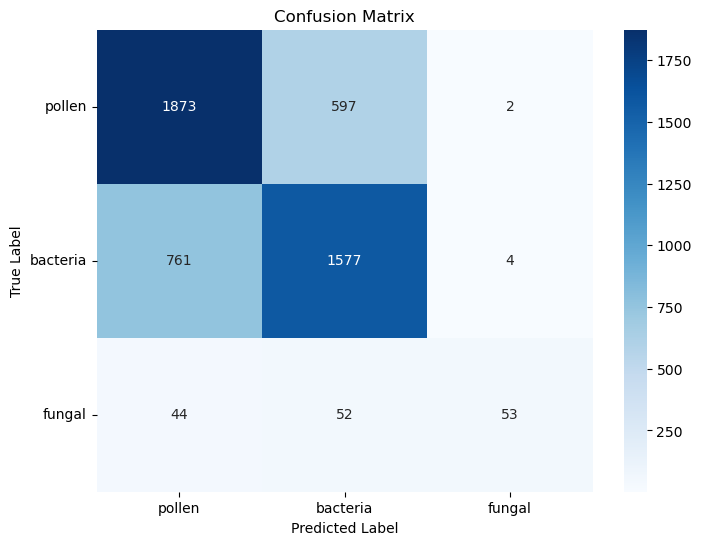

In [21]:
#-------'INSERT CODE HERE'-------

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

features = data[['XE3_scaled','Size','Shape']]
target = data['label']

# 1) Split the data into training and testing sets.
X = features
y = target
# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

# Step 2: Train a Random Forest classification model.
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the model
rf_model.fit(X_train, y_train)
print("Random Forest model trained successfully!")

# Step 3: Predict labels for new data points.
# Predict the species for the test set
predictions = rf_model.predict(X_test)

# Print the first few predictions
print("Predicted labels:", predictions[:5])
print("True labels:", y_test[:5])

# Step 4: Apply K-means Clustering**
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)


# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=set(target), yticklabels=set(target))
# Rotate the y-axis labels to horizontal
plt.yticks(rotation=0)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


#------------------------------